# State of Data Brazil 2022 | Kaggle

## Objetivo

Quais fatores tornam um profissional da área de dados satisfeito

## Metodologia

Usarei a base de dados disponibilizada no desafio State of Data 2022

### Configuração inicial

In [19]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Configurando Pandas para exibir todas as colunas (são muitas colunas)
pd.set_option('display.max_columns', None)

#Revertendo a configuração
#pd.reset_option('display.max_columns')

In [20]:
#Carregamento do Dataset

data = pd.read_csv('data/State_of_data_2022.csv')

In [21]:
#Melhorando a leitura das colunas

data.columns = [coluna.strip("()").replace("'", "").replace(", ", "_") for coluna in data.columns]

In [5]:
#Testando o novo modo de leitura das colunas
data.head()

,P0_id,P1_a _Idade,P1_a_1 _Faixa idade,P1_b _Genero,P1_c _Cor/raca/etnia,P1_d _PCD,P1_e _experiencia_profissional_prejudicada,P1_f _aspectos_prejudicados,P1_g _vive_no_brasil,P1_i _Estado onde mora,P1_i_1 _uf onde mora,P1_i_2 _Regiao onde mora,P1_j _Mudou de Estado?,P1_k _Regiao de origem,P1_l _Nivel de Ensino,P1_m _Área de Formação,P2_a _Qual sua situação atual de trabalho?,P2_b _Setor,P2_c _Numero de Funcionarios,P2_d _Gestor?,P2_e _Cargo como Gestor,P2_f _Cargo Atual,P2_g _Nivel,P2_h _Faixa salarial,P2_i _Quanto tempo de experiência na área de dados você tem?,P2_j _Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,P2_k _Você está satisfeito na sua empresa atual?,P2_l _Qual o principal motivo da sua insatisfação com a empresa atual?,P2_l_1 _Falta de oportunidade de crescimento no emprego atual,P2_l_2 _Salário atual não corresponde ao mercado,P2_l_3 _Não tenho uma boa relação com meu líder/gestor,P2_l_4 _Gostaria de trabalhar em em outra área de atuação,P2_l_5 _Gostaria de receber mais benefícios,P2_l_6 _O clima de trabalho/ambiente não é bom,P2_l_7 _Falta de maturidade analítica na empresa,P2_m _Você participou de entrevistas de emprego nos últimos 6 meses?,P2_n _Você pretende mudar de emprego nos próximos 6 meses?,P2_o _Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,P2_o_1 _Remuneração/Salário,P2_o_2 _Benefícios,P2_o_3 _Propósito do trabalho e da empresa,P2_o_4 _Flexibilidade de trabalho remoto,P2_o_5 _Ambiente e clima de trabalho,P2_o_6 _Oportunidade de aprendizado e trabalhar com referências na área,P2_o_7 _Plano de carreira e oportunidades de crescimento profissional,P2_o_8 _Maturidade da empresa em termos de tecnologia e dados,P2_o_9 _Qualidade dos gestores e líderes,P2_o_10 _Reputação que a empresa tem no mercado,P2_p _Atualmente qual a sua forma de trabalho?,P2_q _Qual a forma de trabalho ideal para você?,P2_r _Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,P2_s _Sua empresa passu por Layoff em 2022?,P3_a _Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,P3_b _Quais desses papéis/cargos fazem parte do time (ou chapter) de dados da sua empresa?,P3_b_1 _Analytics Engineer,P3_b_2 _Engenharia de Dados/Data Engineer,P3_b_3 _Analista de Dados/Data Analyst,P3_b_4 _Cientista de Dados/Data Scientist,P3_b_5 _Database Administrator/DBA,P3_b_6 _Analista de Business Intelligence/BI,P3_b_7 _Arquiteto de Dados/Data Architect,P3_b_8 _Data Product Manager/DPM,P3_b_9 _Business Analyst,P3_c _Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?,P3_c_1 _Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.,P3_c_2 _Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.,P3_c_3 _Atração_seleção e contratação de talentos para o time de dados.,P3_c_4 _Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.,P3_c_5 _Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados_garantindo a qualidade e confiabilidade da informação.,P3_c_6 _Sou gestor da equipe responsável pela entrega de dados_estudos_relatórios e dashboards para as áreas de negócio da empresa.,P3_c_7 _Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.,P3_c_8 _Apesar de ser gestor ainda atuo na parte técnica_construindo soluções/análises/modelos etc.,P3_c_9 _Gestão de projetos de dados_cuidando das etapas_equipes envolvidas_atingimento dos objetivos etc.,P3_c_10 _Gestão de produtos de dados_cuidando da visão dos produtos_backlog_feedback de usuários etc.,P3_c_11 _Gestão de pessoas_apoio no desenvolvimento das pessoas_evolução de carreira,P3_d _Quais são os 3 maiores desafios que você tem como gestor no atual momento?,P3_d

In [22]:
#Acessando o id dos usuários pesquisados para criar novos datasets, separando todas as 8 partes da pesquisa
#Deixando-as vinculadas ao id

coluna_principal = data.iloc[:,0]

### Trabalhando os Dados Demográficos

O objetivo aqui é reunir alguns dados demográficos para dar suporte a futuros insights relativos a satisfação do profissional da área de dados.

In [6]:
#Separando todas as perguntas da parte 1 em um novo dataset para análise demográfica

colunas_p1 = [coluna for coluna in data.columns if coluna.startswith('P1')]

data_parte1 = pd.concat([coluna_principal] + [data[coluna] for coluna in colunas_p1], axis=1)

In [28]:
data_parte1.head()

,P0_id,P1_a _Idade,P1_a_1 _Faixa idade,P1_b _Genero,P1_c _Cor/raca/etnia,P1_d _PCD,P1_e _experiencia_profissional_prejudicada,P1_f _aspectos_prejudicados,P1_g _vive_no_brasil,P1_i _Estado onde mora,P1_i_1 _uf onde mora,P1_i_2 _Regiao onde mora,P1_j _Mudou de Estado?,P1_k _Regiao de origem,P1_l _Nivel de Ensino,P1_m _Área de Formação
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...


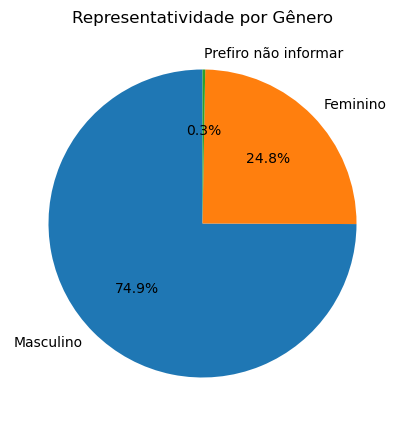

In [38]:
#Gráfico de contagem por gênero

contagem_genero = data_parte1['P1_b _Genero'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=90)

plt.title('Representatividade por Gênero')

plt.show()

Insight: A quantidade de mulheres ocupando posições na área de dados representa apenas 1/4 do mercado.

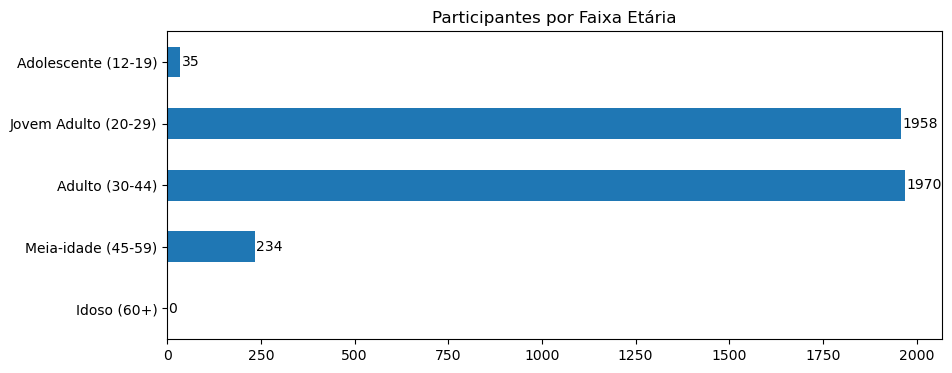

In [10]:
#Gráfico categorizado por faixa-etária categórica.

faixas_etarias = ['Adolescente (12-19)', 'Jovem Adulto (20-29)', 'Adulto (30-44)', 'Meia-idade (45-59)', 'Idoso (60+)']
limites_idade = [11, 19, 29, 44, 59, 100]

data_parte1['Faixa Etária'] = pd.cut(data_parte1['P1_a _Idade'], bins=limites_idade, labels=faixas_etarias)

contagem_faixa_etaria = data_parte1['Faixa Etária'].value_counts()

contagem_faixa_etaria = contagem_faixa_etaria.reindex(faixas_etarias)

plt.figure(figsize=(10, 4))
ax = contagem_faixa_etaria.plot(kind='barh')
plt.title('Participantes por Faixa Etária')

for i, v in enumerate(contagem_faixa_etaria):
    ax.text(v + 3, i, str(v), color='black', va='center')

plt.gca().invert_yaxis()  # Inverte o eixo y para a faixa etária mais jovem aparecer no topo
plt.show()

Insight: Nada além do esperado, levando em conta o tempo de vida da área e o acesso de novos profissionais durante ou após a faculdade. (Verificar posteriormente de a idade é relevante para a satisfação do profissional) 

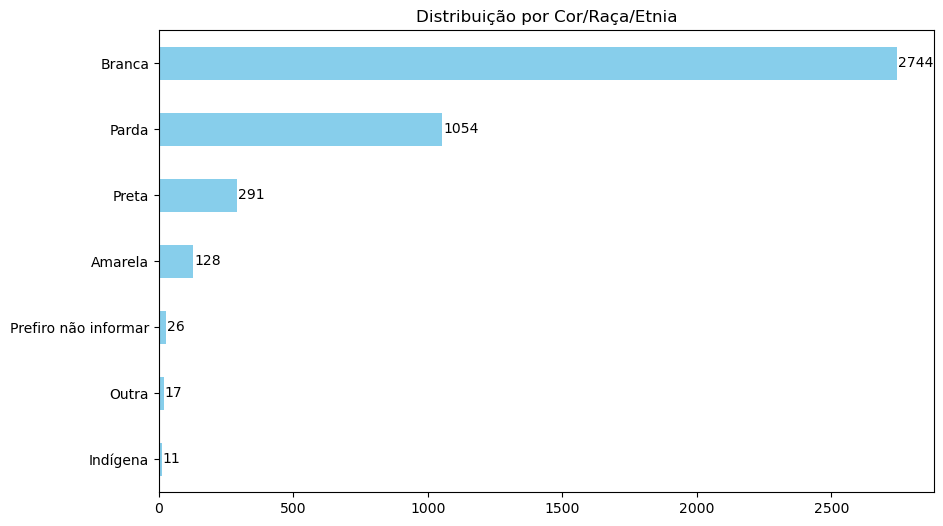

In [17]:
#Gráfico de contagem por raça - definir a predominância

contagem_cor_raca = data_parte1['P1_c _Cor/raca/etnia'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_cor_raca.plot(kind='barh', color='skyblue')

plt.title('Distribuição por Cor/Raça/Etnia')

for i, v in enumerate(contagem_cor_raca):
    ax.text(v + 3, i, str(v), color='black', va='center')
    

plt.gca().invert_yaxis()  # Inverte o eixo y para a categoria mais comum aparecer no topo
plt.show()

Insight: O fato do público ser majoritariamente branco, pode estar ligado diretamente a escolaridade. Porém cruzarei essa informação com outras abordagens nesse estudo para verificar se a raça tem alguma influencia na satisfação do profissional.

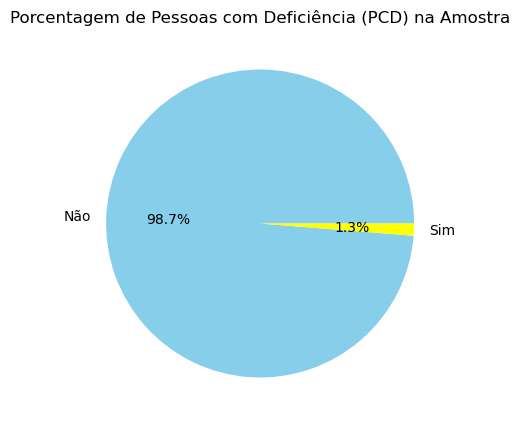

In [25]:
#Quanto o público PCD representa em relação ao total de pessoas da amostra

data_filtrado = data_parte1[data['P1_d _PCD'] != 'Prefiro não informar']

contagem_pcd = data_filtrado['P1_d _PCD'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(contagem_pcd, labels=contagem_pcd.index, autopct='%1.1f%%', colors=['skyblue', 'yellow'])

plt.title('Porcentagem de Pessoas com Deficiência (PCD) na Amostra')

plt.show()

Insight: Pode ser que a área não promova inclusão de forma eficiênte. Para determinar essa conclusão, precisarei cruzar esses dados com os dados demográficos de outros orgãos, como o IBGE

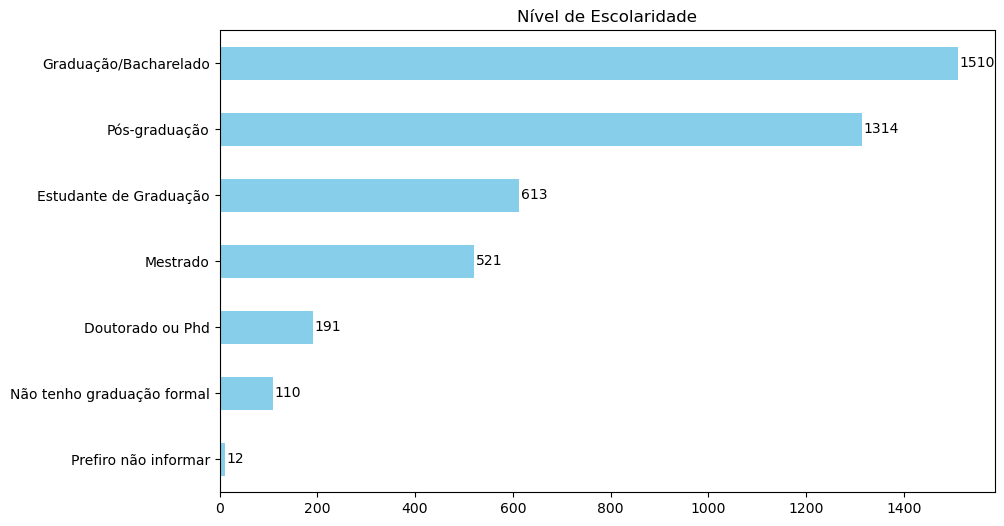

In [10]:
#Gráfico de nível de escolaridade

contagem_escolaridade = data_parte1['P1_l _Nivel de Ensino'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_escolaridade.plot(kind='barh', color='skyblue')

plt.title('Nível de Escolaridade')

for i, v in enumerate(contagem_escolaridade):
    ax.text(v + 3, i, str(v), color='black', va='center')
    

plt.gca().invert_yaxis()  # Inverte o eixo y para a categoria mais comum aparecer no topo
plt.show()

Insight: Pessoas sem graduação podem ter dificuldade para entrar no mercado de trabalho

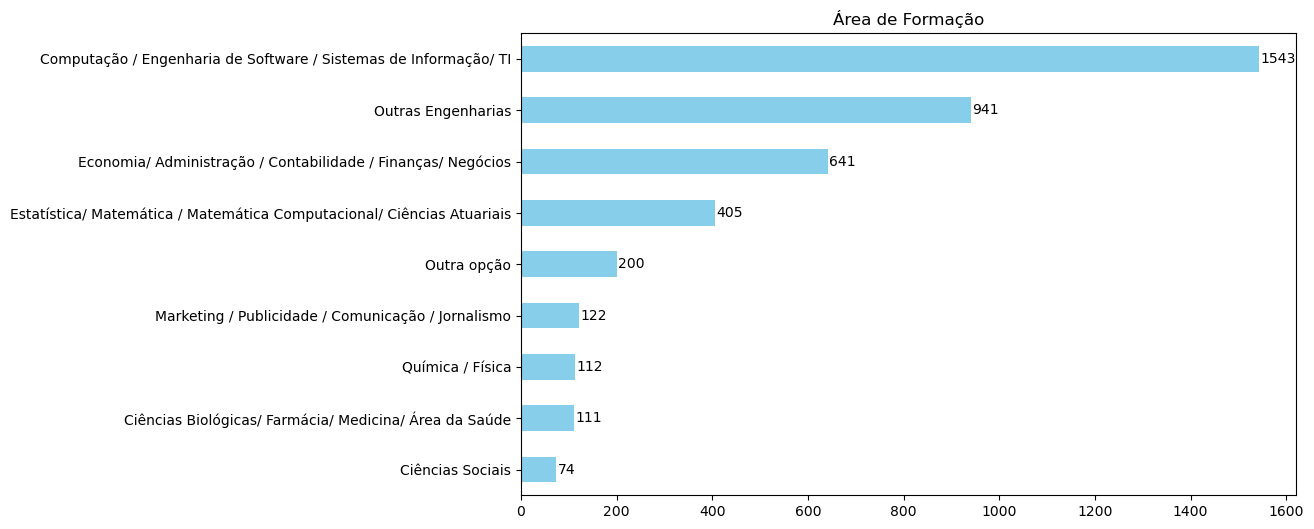

In [56]:
#Área de formação

contagem_formacao = data_parte1['P1_m _Área de Formação'].value_counts()

plt.figure(figsize=(10, 6))
ax = contagem_formacao.plot(kind='barh', color='skyblue')

plt.title('Área de Formação')

for i, v in enumerate(contagem_formacao):
    ax.text(v + 3, i, str(v), color='black', va='center')
    

plt.gca().invert_yaxis()  # Inverte o eixo y para a categoria mais comum aparecer no topo
plt.show()

Insight: Cursar computação ou áreas correlatas não é determinante para trabalhar na área de dados

In [41]:
#Criando um mapa para exibir a quantidade de profissionais por região do país

import geopandas as gpd
from matplotlib.ticker import FuncFormatter

In [11]:
mapa_uf = gpd.read_file('data/IBGE_UF/BR_UF_2022.shp')

C:\Users\Filiphe\AppData\Local\Temp\ipykernel_12212\2932465550.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(mapa_uf.geometry.centroid.x, mapa_uf.geometry.centroid.y, mapa_uf['Contagem']):


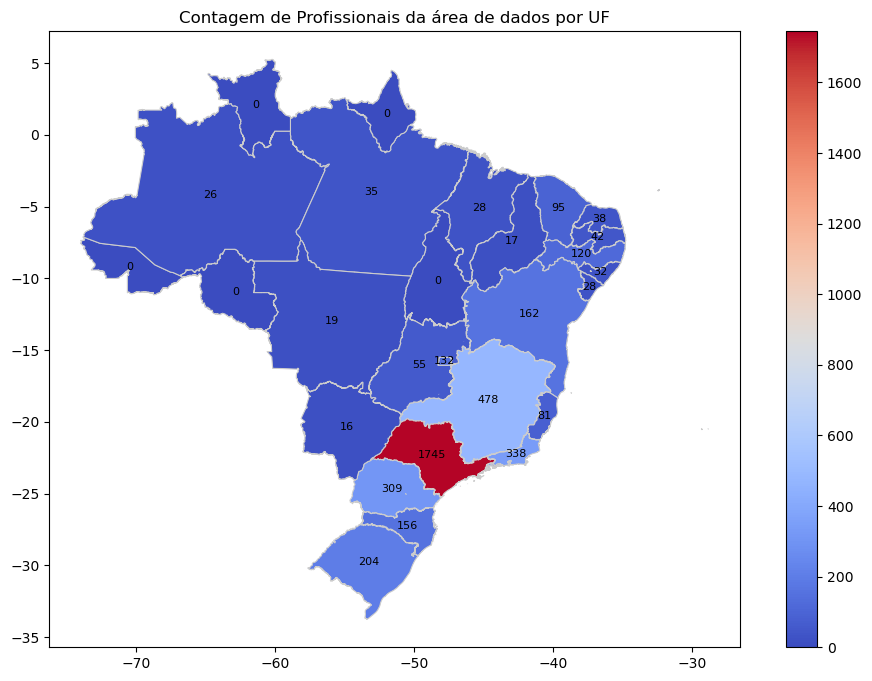

In [54]:
contagem_por_uf = data_parte1['P1_i_1 _uf onde mora'].value_counts().reset_index()
contagem_por_uf.columns = ['P1_i_1 _uf onde mora', 'Contagem']

mapa_uf = mapa_uf.merge(contagem_por_uf, left_on='SIGLA_UF', right_on='P1_i_1 _uf onde mora', how='left', suffixes=('_left', '_right'))

mapa_uf['Contagem'].fillna(0, inplace=True)

mapa_uf['Contagem'] = mapa_uf['Contagem'].astype(int)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_uf.plot(column='Contagem', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(mapa_uf.geometry.centroid.x, mapa_uf.geometry.centroid.y, mapa_uf['Contagem']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

plt.title('Contagem de Profissionais da área de dados por UF')

# Mostre o mapa
plt.show()

Insight: Grande maioria localizada na região sul e sudeste do país. Região norte carece de profissionais na área de dados.

In [57]:
#Exportando o dataset criado para a primeira parte da análise em excel

data_parte1.to_excel('data_parte1.xlsx', index = False)